# Get the data and imports

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2023-02-25 12:47:06--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: 'airline_passengers.csv'

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-02-25 12:47:06 (34.1 MB/s) - 'airline_passengers.csv' saved [2036/2036]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# Check if there are any nan values
df.isna().sum()

Passengers    0
dtype: int64

<Axes: xlabel='Month'>

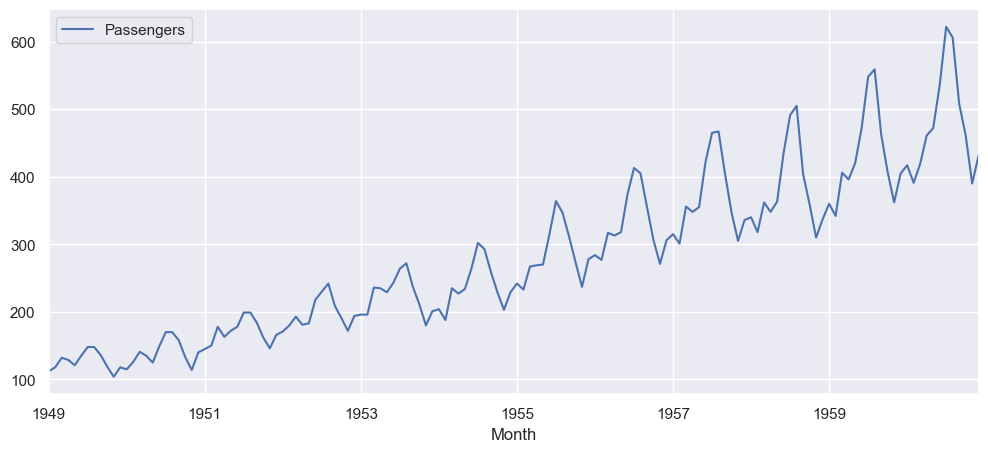

In [5]:
# Plot the data to see the trend
df.plot(figsize=(12, 5))

Can observe both a trend and a cyclcical component.

# Calculate the EWMA

<Axes: xlabel='Month'>

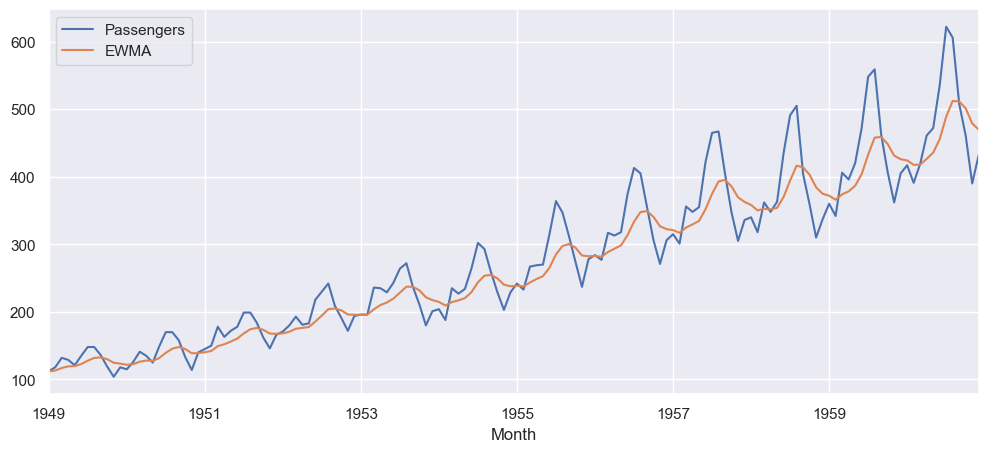

In [6]:
alpha = 0.2
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean() # adjust=False means that we are using the formula for the EWMA
df.plot(figsize=(12, 5))

<Axes: xlabel='Month'>

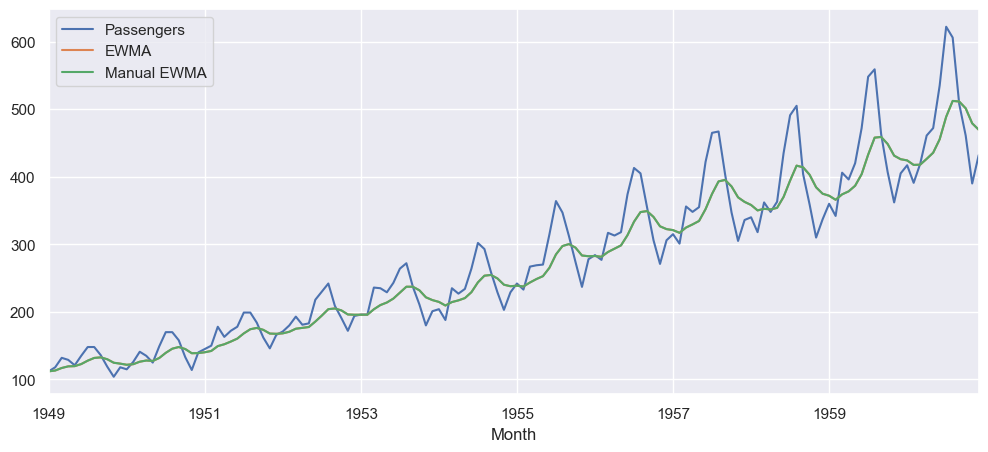

In [7]:
# Calculate manual ewma

manual_ewma = []
for x in df['Passengers']:
    if len(manual_ewma) == 0:
        manual_ewma.append(x)
    else:
        manual_ewma.append(alpha * x + (1 - alpha) * manual_ewma[-1])
    
df['Manual EWMA'] = manual_ewma

df.plot(figsize=(12, 5))
